In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [2]:
credit = pd.read_csv('/home/faculty/millbr02/pub/UCI_Credit_Card.csv')

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,6859,30000.0,F,3,MARRIED,48,0,0,0,0,...,29614.0,30127,29646.0,1751.0,1700.0,2500.0,1000.0,2000.0,4034.0,0
1,23890,20000.0,M,2,SINGLE,27,-1,-1,-2,-2,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,9052,70000.0,F,2,SINGLE,25,0,0,0,0,...,44590.0,45890,47126.0,2294.0,2100.0,1600.0,2000.0,2000.0,1750.0,1
3,3674,20000.0,M,3,MARRIED,47,2,2,2,2,...,17608.0,17187,17528.0,3114.0,800.0,770.0,0.0,776.0,549.0,1
4,14860,30000.0,F,3,SINGLE,34,-1,-1,-1,-1,...,5476.0,0,0.0,10621.0,15685.0,5827.0,0.0,0.0,0.0,0


In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
 credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 25 columns):
ID                            6001 non-null int64
LIMIT_BAL                     6001 non-null float64
SEX                           6001 non-null object
EDUCATION                     6001 non-null int64
MARRIAGE                      6001 non-null object
AGE                           6001 non-null int64
PAY_0                         6001 non-null int64
PAY_2                         6001 non-null int64
PAY_3                         6001 non-null int64
PAY_4                         6001 non-null int64
PAY_5                         6001 non-null int64
PAY_6                         6001 non-null int64
BILL_AMT1                     6001 non-null int64
BILL_AMT2                     6001 non-null int64
BILL_AMT3                     6001 non-null int64
BILL_AMT4                     6001 non-null float64
BILL_AMT5                     6001 non-null int64
BILL_AMT6                     6001 no

In [6]:
credit["default.payment.next.month"].value_counts()

0    4713
1    1288
Name: default.payment.next.month, dtype: int64

In [7]:
credit["SEX"].value_counts()

F    3592
M    2409
Name: SEX, dtype: int64

In [8]:
credit["MARRIAGE"].value_counts()

SINGLE     3166
MARRIED    2774
3            52
0             9
Name: MARRIAGE, dtype: int64

In [9]:
cr = credit[credit.MARRIAGE!="3"]
credit = cr[cr.MARRIAGE!= "0"]

In [10]:
credit.describe()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,...,5940.000000,5940.000000,5940.000000,5940.000000,5.940000e+03,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000
mean,14958.037374,171045.454545,1.849832,35.567845,-0.032323,-0.166162,-0.193434,-0.246633,-0.288047,-0.307744,...,44250.745286,41517.406566,40005.842929,5445.691246,5.917863e+03,5616.928956,5082.591582,4603.732660,4877.106902,0.213636
std,8777.931354,130612.689455,0.803894,9.119547,1.110633,1.171661,1.174944,1.142019,1.110357,1.144358,...,65560.702334,62747.600575,61784.772135,14235.208414,2.102151e+04,18532.473989,15300.213369,13237.783686,14310.524673,0.409907
min,5.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-15910.000000,-20254.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7266.250000,60000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2313.750000,1831.500000,1239.500000,1000.000000,8.375000e+02,398.000000,297.500000,300.000000,158.000000,0.000000
50%,14972.500000,150000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19335.500000,18593.500000,17428.000000,2200.000000,2.077500e+03,1845.500000,1522.500000,1587.000000,1500.000000,0.000000
75%,22683.000000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57350.500000,52305.750000,50658.750000,5052.000000,5.004500e+03,4832.000000,4403.500000,4181.500000,4200.000000,0.000000
max,29996.000000,730000.000000,6.000000,71.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,...,706864.000000,823540.000000,699944.000000,405016.000000,1.024516e+06,508229.000000,432130.000000,287982.000000,345293.000000,1.000000


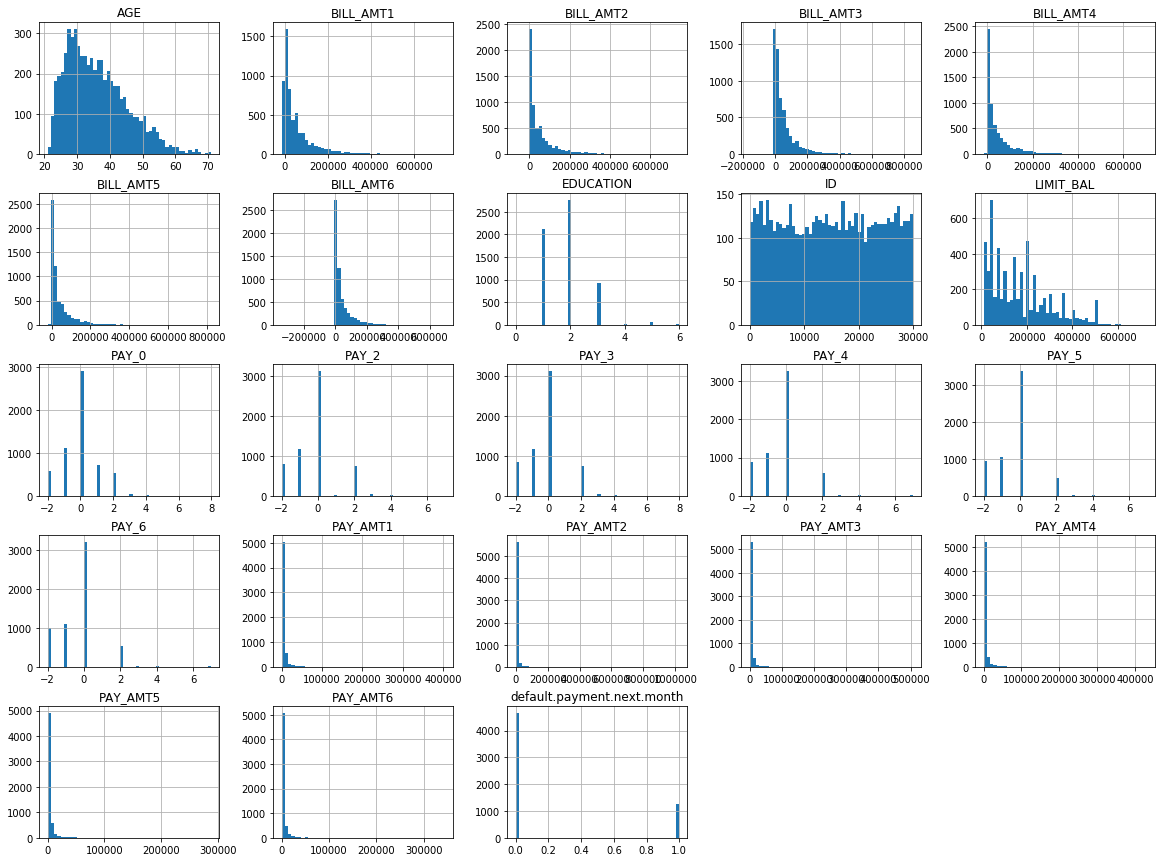

In [11]:
credit.hist(bins=50, figsize=(20,15))
plt.show()

### How does the probability of default payment vary by categories of different demographic variables?

In [12]:
sex_mar_prob = credit.groupby(["SEX","MARRIAGE"]).agg({"SEX":"count", "default.payment.next.month":"sum"})

In [13]:
sex_mar_prob["Probability"] = sex_mar_prob["default.payment.next.month"]/sex_mar_prob["SEX"]
sex_mar_prob

SEX  default.payment.next.month  Probability
SEX MARRIAGE                                               
F   MARRIED   1691                         375     0.221762
    SINGLE    1863                         334     0.179281
M   MARRIED   1083                         291     0.268698
    SINGLE    1303                         269     0.206447

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87082eb780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8707dc95f8>]], dtype=object)

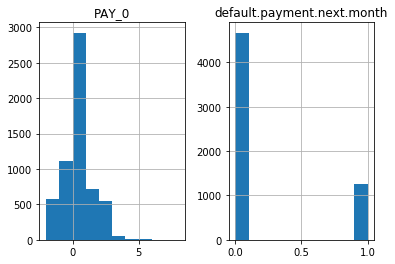

In [14]:
credit[["PAY_0", "default.payment.next.month"]].hist()

In [15]:
credit.sort_values("SEX")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,6859,30000.0,F,3,MARRIED,48,0,0,0,0,...,29614.0,30127,29646.0,1751.0,1700.0,2500.0,1000.0,2000.0,4034.0,0
3500,10482,420000.0,F,1,SINGLE,41,-1,-1,-1,-1,...,80831.0,39333,26831.0,15262.0,13523.0,80854.0,787.0,850.0,75341.0,0
3503,21581,30000.0,F,3,MARRIED,23,1,2,0,0,...,27030.0,29079,29865.0,1.0,1433.0,1500.0,2500.0,1400.0,1400.0,1
3504,11347,310000.0,F,1,SINGLE,32,1,-2,-1,0,...,326.0,-235,-235.0,0.0,326.0,0.0,0.0,0.0,1200.0,0
3505,14294,160000.0,F,2,MARRIED,47,1,-2,-2,-2,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3506,15864,80000.0,F,2,MARRIED,29,0,0,2,2,...,55081.0,55350,55906.0,5120.0,2600.0,0.0,2200.0,2028.0,3000.0,0
3508,17477,80000.0,F,1,MARRIED,44,-1,-1,-1,-1,...,500.0,500,6155.0,3673.0,11285.0,500.0,500.0,6155.0,1440.0,0
3509,19261,250000.0,F,1,SINGLE,29,2,2,2,2,...,122209.0,126129,127847.0,5900.0,4500.0,0.0,5954.0,3900.0,4826.0,1
3511,16985,360000.0,F,2,MARRIED,33,-1,-1,-1,0,...,10013.0,-24,-24.0,20000.0,8660.0,1510.0,0.0,0.0,5189.0,0
3514,4835,120000.0,F,3,SINGLE,26,0,0,-2,-1,...,1282.0,81988,83665.0,1534.0,1300.0,2000.0,81899.0,3200.0,4000.0,0


In [16]:
matrix = credit.corr()
matrix[['default.payment.next.month']]

,default.payment.next.month
ID,-0.027069
LIMIT_BAL,-0.147237
EDUCATION,0.032991
AGE,0.027990
PAY_0,0.331026
PAY_2,0.268502
PAY_3,0.254330
PAY_4,0.226236
PAY_5,0.211066
PAY_6,0.194742


### Effect of sex on default payment

In [17]:
male_sex = credit[credit.SEX=="M"].groupby(["SEX"]).agg({"default.payment.next.month":"sum"})
male_sex

,default.payment.next.month
SEX,
M,560


In [18]:
female_sex = credit[credit.SEX=="F"].groupby(["SEX"]).agg({"default.payment.next.month":"sum"})
female_sex

,default.payment.next.month
SEX,
F,709


In [19]:
#Probability of Default Payment of male versus female
male = 560/(560+709)
male*100

44.12923561859732

In [20]:
female = 709/(560+709)
female*100

55.87076438140268

#### From above the probability of default payment of females is higher than males by 11%

In [21]:
#Further Info

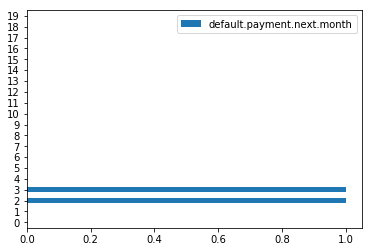

In [22]:
credit[["SEX","default.payment.next.month"]].head(20).plot(kind='barh')


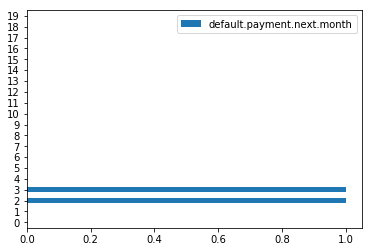

In [23]:
credit[["MARRIAGE","default.payment.next.month"]].head(20).plot(kind='barh')

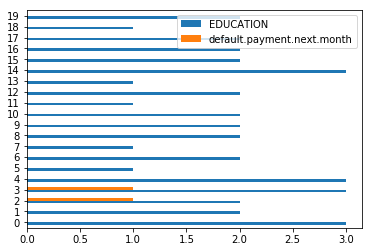

In [24]:
credit[["EDUCATION","default.payment.next.month"]].head(20).plot(kind='barh')

In [25]:
allocated_credit = credit[["LIMIT_BAL","default.payment.next.month"]].sort_values('LIMIT_BAL')

In [26]:
allocated_credit[allocated_credit.LIMIT_BAL > 500000].sum()

LIMIT_BAL                     30150000.0
default.payment.next.month           5.0
dtype: float64

In [27]:
allocated_credit[allocated_credit.LIMIT_BAL > 500000].count()

LIMIT_BAL                     52
default.payment.next.month    52
dtype: int64

In [28]:
allocated_probability = 5/52
allocated_probability

0.09615384615384616

In [29]:
allocated_credit[allocated_credit.LIMIT_BAL > 10000].count()

LIMIT_BAL                     5846
default.payment.next.month    5846
dtype: int64

In [30]:
allocated_credit['Category'] = allocated_credit['LIMIT_BAL'].apply(lambda x: 50000*np.floor(x/50000))

In [31]:
grouped_amount = allocated_credit.groupby('Category')[['LIMIT_BAL','default.payment.next.month']].agg({"LIMIT_BAL":'count', "default.payment.next.month":'sum'})

In [32]:
grouped_amount['Probability'] = grouped_amount['default.payment.next.month']/grouped_amount['LIMIT_BAL']
grouped_amount

,LIMIT_BAL,default.payment.next.month,Probability
Category,,,
0.0,820,278,0.339024
50000.0,1392,361,0.259339
100000.0,726,176,0.242424
150000.0,712,120,0.168539
200000.0,838,133,0.158711
250000.0,402,58,0.144279
300000.0,314,42,0.133758
350000.0,293,44,0.150171
400000.0,153,19,0.124183


In [33]:
credit_payment = credit[['ID','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default.payment.next.month']]

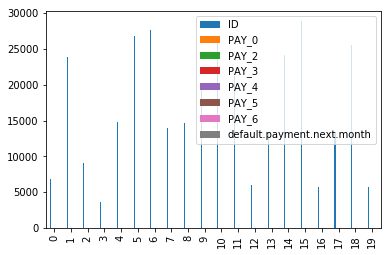

In [34]:
credit_payment.head(20).plot(kind='bar')

In [35]:
credit_payment.head()

,ID,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,6859,0,0,0,0,0,0,0
1,23890,-1,-1,-2,-2,-2,-2,0
2,9052,0,0,0,0,0,0,1
3,3674,2,2,2,2,2,0,1
4,14860,-1,-1,-1,-1,-1,-2,0


In [36]:
def total(row):
    val = (credit_payment['PAY_0'] + credit_payment['PAY_2'] + credit_payment['PAY_3'] + credit_payment['PAY_4'] +
          credit_payment['PAY_5'] + credit_payment['PAY_6'])/6
    return val

#credit_payment["Average"] = credit_payment.apply(total, axis=0)

In [37]:
credit_payment

,ID,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,6859,0,0,0,0,0,0,0
1,23890,-1,-1,-2,-2,-2,-2,0
2,9052,0,0,0,0,0,0,1
3,3674,2,2,2,2,2,0,1
4,14860,-1,-1,-1,-1,-1,-2,0
5,26833,0,0,0,0,0,0,0
6,27646,-1,-1,0,-1,-1,-1,0
7,13924,-2,-1,0,0,-2,-2,0
8,14687,-2,-2,-2,-2,-2,-2,0
9,19647,0,0,-1,-1,0,0,0


### Training set and data classification

In [38]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

In [39]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [40]:
train_set, test_set = split_train_test(credit, 0.2)
print(len(train_set), "train +", len(test_set), "test")

4752 train + 1188 test


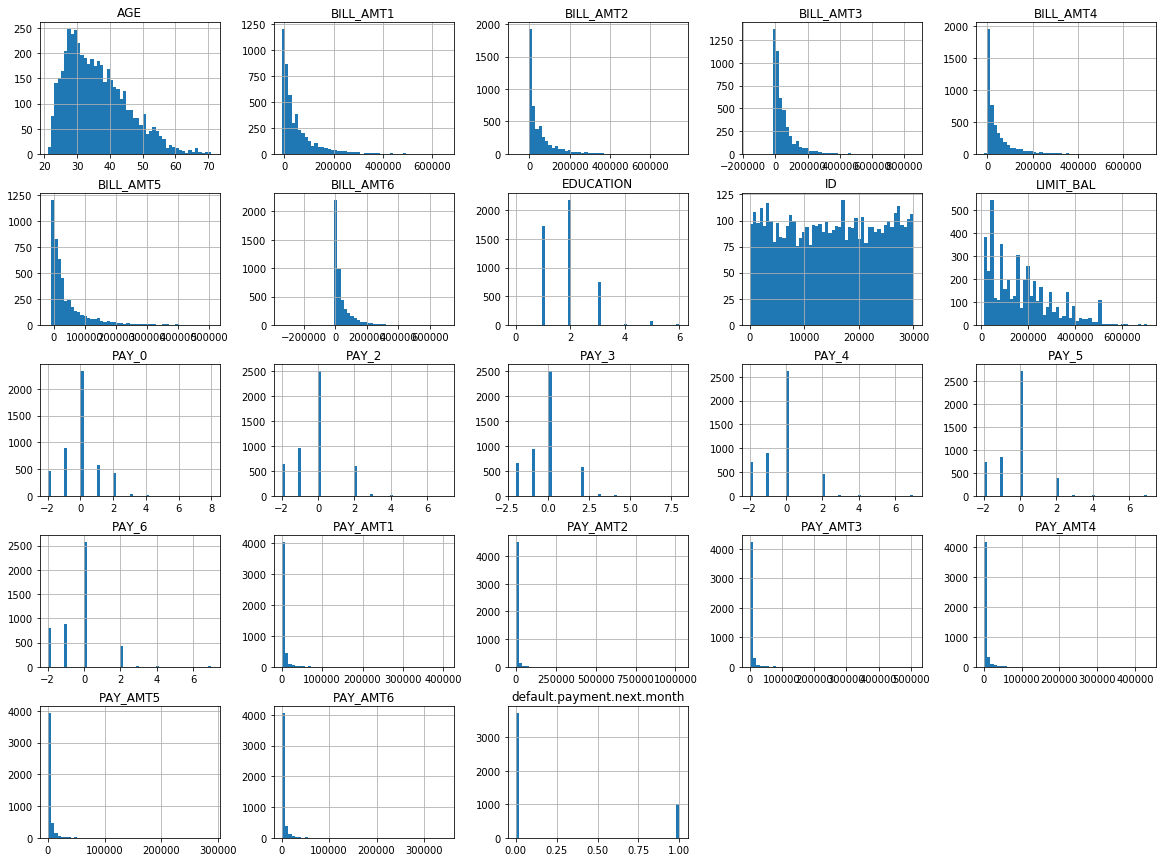

In [41]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [42]:
train_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
4717,10408,200000.0,M,1,MARRIED,51,0,-1,0,0,...,14240.0,23762,18198.0,52556.0,2003.0,1000.0,26068.0,10019.0,61500.0,0
5456,23817,50000.0,F,3,MARRIED,53,0,0,0,0,...,37280.0,18678,18602.0,2182.0,2400.0,1000.0,18678.0,600.0,500.0,0
1311,1612,300000.0,F,3,MARRIED,30,-1,-1,0,0,...,16416.0,3972,2200.0,15042.0,25500.0,6000.0,3972.0,2200.0,0.0,0
2843,10178,60000.0,F,2,MARRIED,30,0,0,0,0,...,38874.0,38667,39544.0,1628.0,1618.0,1375.0,1403.0,1520.0,1205.0,0
4157,18258,210000.0,M,2,MARRIED,66,-1,2,-1,-1,...,390.0,780,390.0,0.0,780.0,390.0,780.0,0.0,390.0,1


In [43]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [44]:
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

In [45]:
credit_with_id = credit.reset_index() 
train_set, test_set = split_train_test_by_id(credit_with_id, 0.2, "index")

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


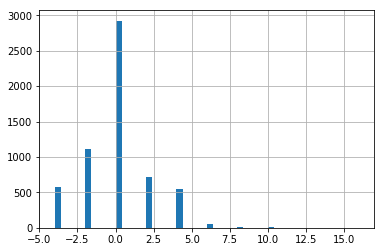

In [46]:
credit['PAY_CATEGORY'] = credit['PAY_0']/0.5
credit.PAY_CATEGORY.hist(bins=50)
plt.show()

In [47]:
credit['PAY_CATEGORY'].where(credit['PAY_CATEGORY'] < 5, 5, inplace = True)

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
#credit.corr()["default.payment.next.month"]

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(credit, credit["PAY_CATEGORY"]):
    strat_train_set = credit.loc[train_index]
    strat_test_set = credit.loc[test_index]

In [50]:
credit = strat_train_set.copy()

In [51]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_CATEGORY
3692,3668.0,180000.0,F,6.0,MARRIED,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000.0,1400.0,639.0,0.0,0.0,0.0,0.0,0.0
760,27936.0,50000.0,F,2.0,SINGLE,28.0,0.0,0.0,0.0,0.0,...,27184.0,27752.0,1398.0,1431.0,3000.0,0.0,1155.0,1025.0,0.0,0.0
3619,6128.0,180000.0,F,2.0,MARRIED,60.0,2.0,2.0,2.0,0.0,...,170173.0,139649.0,2600.0,5022.0,5000.0,6000.0,7000.0,6000.0,1.0,4.0
4751,3151.0,500000.0,F,3.0,SINGLE,52.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-4.0
1016,3611.0,210000.0,F,1.0,SINGLE,28.0,0.0,0.0,0.0,0.0,...,140051.0,142976.0,9000.0,9007.0,5254.0,6000.0,5500.0,5000.0,0.0,0.0
641,16066.0,120000.0,F,2.0,MARRIED,46.0,0.0,0.0,0.0,0.0,...,61036.0,61359.0,3458.0,2519.0,2158.0,2151.0,2368.0,2197.0,0.0,0.0
1598,18618.0,80000.0,F,5.0,MARRIED,25.0,0.0,0.0,0.0,0.0,...,77454.0,78862.0,3500.0,4000.0,3400.0,4000.0,3349.0,2784.0,0.0,0.0
3987,11188.0,200000.0,F,2.0,MARRIED,39.0,-1.0,2.0,-1.0,-1.0,...,3331.0,0.0,0.0,5881.0,20.0,3331.0,0.0,8447.0,0.0,-2.0
256,29423.0,50000.0,M,2.0,SINGLE,31.0,0.0,0.0,0.0,0.0,...,0.0,800.0,2200.0,2000.0,3000.0,0.0,400.0,20000.0,0.0,0.0
1632,21661.0,70000.0,F,2.0,SINGLE,23.0,0.0,0.0,0.0,0.0,...,47888.0,44198.0,2413.0,2605.0,2013.0,2003.0,1607.0,1606.0,0.0,0.0


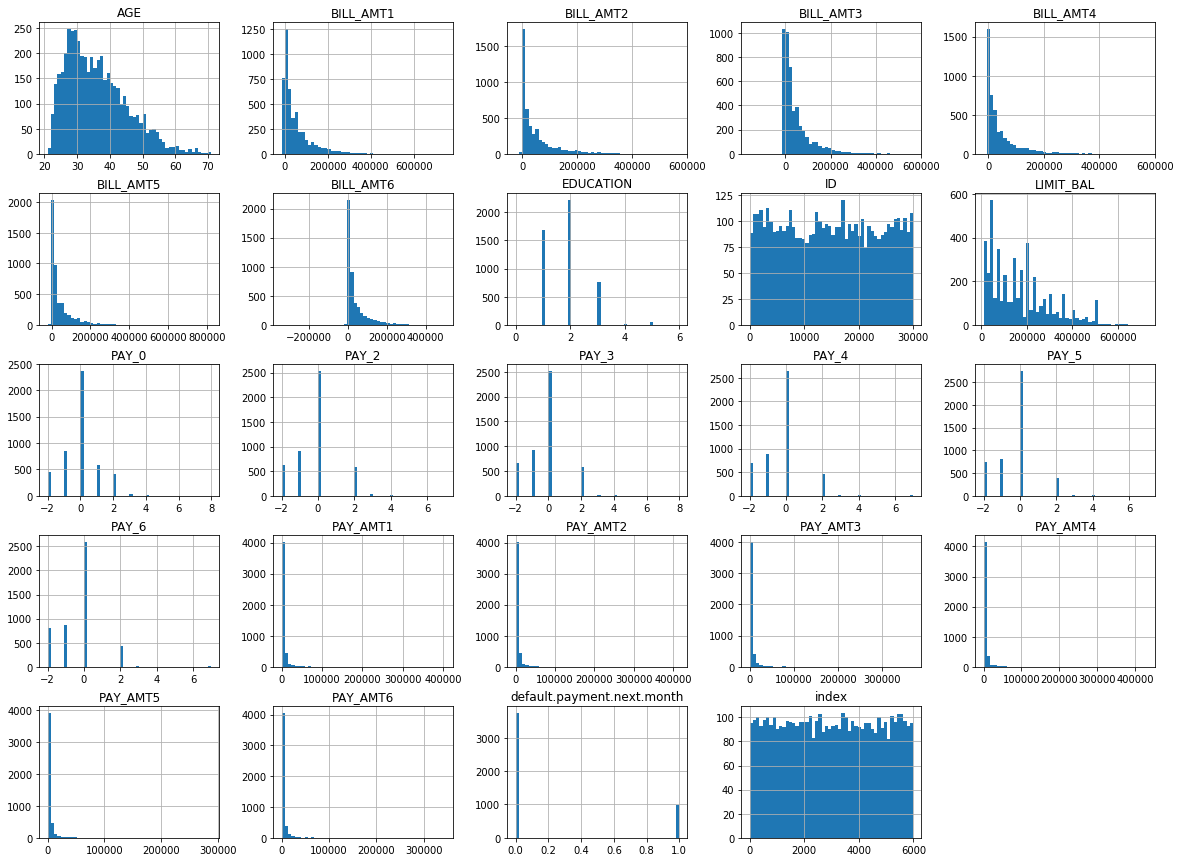

In [52]:
train_set.hist(bins=50, figsize=(20, 15))
plt.show()

In [53]:
train_set.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,6859,30000.0,F,3,MARRIED,48,0,0,0,...,29614.0,30127,29646.0,1751.0,1700.0,2500.0,1000.0,2000.0,4034.0,0
1,1,23890,20000.0,M,2,SINGLE,27,-1,-1,-2,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,9052,70000.0,F,2,SINGLE,25,0,0,0,...,44590.0,45890,47126.0,2294.0,2100.0,1600.0,2000.0,2000.0,1750.0,1
3,3,3674,20000.0,M,3,MARRIED,47,2,2,2,...,17608.0,17187,17528.0,3114.0,800.0,770.0,0.0,776.0,549.0,1
6,6,27646,100000.0,F,2,MARRIED,24,-1,-1,0,...,23472.0,12500,14666.0,7500.0,10035.0,23500.0,12500.0,14666.0,79053.0,0


In [54]:
credit_labels = strat_test_set["default.payment.next.month"].copy()

In [55]:
credit['PAY_CATEGORY'].value_counts()/len(credit)

 0.0    0.486111
-2.0    0.183291
 2.0    0.121423
-4.0    0.095960
 4.0    0.092172
 5.0    0.011574
Name: PAY_CATEGORY, dtype: float64

In [56]:
train_set['PAY_CATEGORY'].value_counts()/len(train_set)

KeyError: 'PAY_CATEGORY'

In [57]:
credit.corr()["default.payment.next.month"]

ID                           -0.028632
LIMIT_BAL                    -0.142847
EDUCATION                     0.030893
AGE                           0.022521
PAY_0                         0.334177
PAY_2                         0.280649
PAY_3                         0.267535
PAY_4                         0.225307
PAY_5                         0.214275
PAY_6                         0.196644
BILL_AMT1                    -0.009121
BILL_AMT2                     0.002156
BILL_AMT3                     0.000374
BILL_AMT4                    -0.000010
BILL_AMT5                     0.007248
BILL_AMT6                     0.011467
PAY_AMT1                     -0.078409
PAY_AMT2                     -0.070170
PAY_AMT3                     -0.057643
PAY_AMT4                     -0.052206
PAY_AMT5                     -0.037499
PAY_AMT6                     -0.052814
default.payment.next.month    1.000000
PAY_CATEGORY                  0.332919
Name: default.payment.next.month, dtype: float64

In [58]:
credit= strat_train_set.copy()

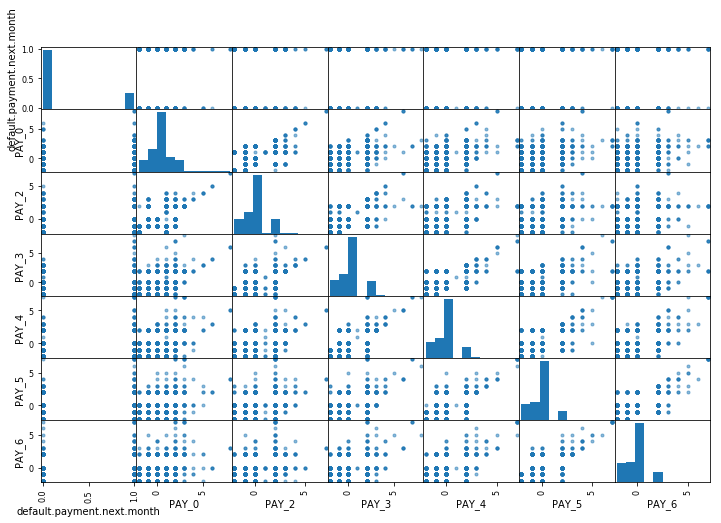

In [59]:
from pandas.tools.plotting import scatter_matrix

attributes = ["default.payment.next.month", 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
scatter_matrix(credit[attributes], figsize=(12, 8))
plt.show()

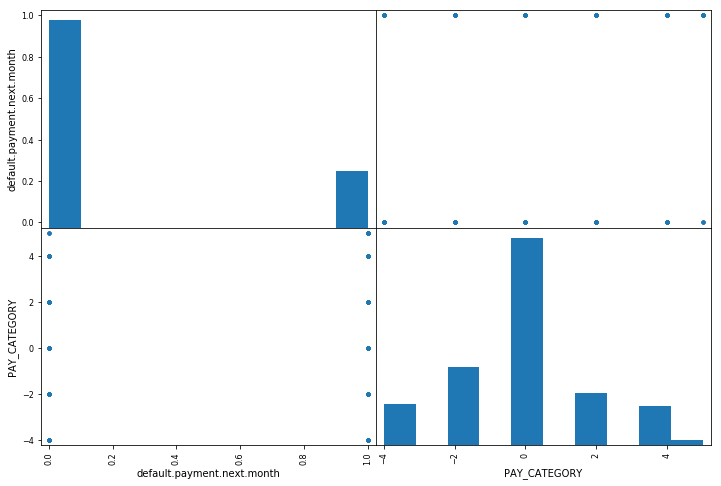

In [60]:
attributes = ["default.payment.next.month", "PAY_CATEGORY"]
scatter_matrix(credit[attributes], figsize=(12, 8))
plt.show()

In [61]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

imputer.fit(credit_numerical)

NameError: name 'credit_numerical' is not defined

In [ ]:
imputer.statistics_

In [ ]:
credit_numerical.median().values

In [ ]:
credit_numerical = credit.drop(['MARRIAGE','SEX'], axis=1)
num_attr = list(credit_numerical)

In [ ]:
x = imputer.transform(credit_numerical)
x

### Machine Learning


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
credit_category1 = credit["SEX"].factorize()[0]

encoder1.fit_transform(credit_category1)

In [ ]:
encoder2 = LabelEncoder()
credit_category2 = credit["MARRIAGE"].factorize()[0]

encoder2.fit_transform(credit_category2)

In [ ]:
encoder1.classes_

In [ ]:
c = credit[credit.MARRIAGE!="NaN"]
b = credit[credit.SEX!="NaN"]

In [ ]:
credit.info()

In [ ]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr))
])

In [ ]:
prePaparedData = num_pipeline.fit_transform(credit_numerical)

In [66]:
credit_age = list(credit["AGE"])
credit_age

[35.0,
 28.0,
 60.0,
 52.0,
 28.0,
 46.0,
 25.0,
 39.0,
 31.0,
 23.0,
 43.0,
 36.0,
 35.0,
 33.0,
 36.0,
 25.0,
 39.0,
 32.0,
 36.0,
 37.0,
 38.0,
 27.0,
 41.0,
 43.0,
 37.0,
 39.0,
 25.0,
 28.0,
 40.0,
 32.0,
 41.0,
 26.0,
 23.0,
 52.0,
 26.0,
 46.0,
 44.0,
 33.0,
 34.0,
 36.0,
 27.0,
 23.0,
 34.0,
 38.0,
 49.0,
 35.0,
 38.0,
 30.0,
 31.0,
 35.0,
 28.0,
 39.0,
 31.0,
 31.0,
 29.0,
 31.0,
 50.0,
 41.0,
 31.0,
 26.0,
 26.0,
 32.0,
 27.0,
 29.0,
 26.0,
 23.0,
 26.0,
 39.0,
 38.0,
 30.0,
 50.0,
 27.0,
 33.0,
 37.0,
 41.0,
 29.0,
 44.0,
 27.0,
 27.0,
 38.0,
 44.0,
 28.0,
 52.0,
 38.0,
 40.0,
 38.0,
 39.0,
 52.0,
 34.0,
 66.0,
 24.0,
 27.0,
 25.0,
 51.0,
 49.0,
 27.0,
 24.0,
 27.0,
 25.0,
 22.0,
 56.0,
 23.0,
 32.0,
 31.0,
 44.0,
 39.0,
 52.0,
 34.0,
 27.0,
 29.0,
 48.0,
 35.0,
 27.0,
 47.0,
 40.0,
 45.0,
 50.0,
 28.0,
 37.0,
 36.0,
 32.0,
 43.0,
 30.0,
 44.0,
 45.0,
 36.0,
 44.0,
 36.0,
 29.0,
 37.0,
 31.0,
 40.0,
 28.0,
 30.0,
 24.0,
 36.0,
 32.0,
 29.0,
 61.0,
 31.0,
 50.0,
 30.0,
 29.0,

In [ ]:
age_pipeline = Pipeline([('selector', DataFrameSelector(credit_age))])

In [ ]:
prepared_age = age_pipeline.fit_transform(credit["AGE"])
prepared_age

In [ ]:
category = ["SEX", "MARRIAGE"]

In [ ]:
prepared_num_values

In [ ]:
cat_pipeline = Pipeline([
    ('selector1', DataFrameSelector(catag)),
    ('label_binarizer1', LabelBinarizer()),
    ('imputer', Imputer(strategy="most_frequent")),
])

In [ ]:
prepared_num_values = num_pipeline.fit_transfrom(creditinfo_numerical)
prepared_num_values

Object `DataFrameSelector` not found.


In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline")
])

In [ ]:
full_pipeline.fit_transform(credit)

In [ ]:
from sklearn import preprocessing
c = creditinfo[creditinfo.MARRIAGE!="NaN"]
b = creditinfo[creditinfo.SEX!="NaN"]
lb = preprocessing.MultiLabelBinarizer()
c = lb.fit_transfrom(c)
b = lb.fit_transform(b)

In [ ]:
pdata = prepareddata[~np.isnan(prepareddata)]
pdata

In [ ]:
linreg = LinearRegression()
pdata.reshape(-1,1)

In [ ]:
linreg.fit(credit.LIMIT_BAL, credit_labels)

In [68]:
from sklearn.pipeline import make_union, make_pipeline
#from sklearn.preprocessing import FunctionTransfromer
from sklearn.preprocessing import MinMaxScaler

def get_text_cols(creditinfo):
    return creditinfo[["MARRIAGE", "SEX"]]

def get_num_cols(creditinfo):
    return creditinfo_numerical